# Imports

In [1]:
from numpy import *

v = array([1,2, 3, 4, 5])
v @ concatenate((ones(5), zeros(len(v)-5)))

15.0

In [2]:
import pandas as pd
import numpy as np

# Load date files from kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neithan","key":"cb491d19f3c8c1af5b08047593ff7851"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change permission
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d mczielinski/bitcoin-historical-data

100% 135M/135M [00:01<00:00, 111MB/s]
100% 135M/135M [00:01<00:00, 112MB/s]


In [6]:
from zipfile import ZipFile
file_name = "bitcoin-historical-data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [7]:
df = pd.read_csv("coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [8]:
# date missing
df.isnull()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,False,False,False,False,False,False,False,False
1,False,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
2099755,False,False,False,False,False,False,False,False
2099756,False,False,False,False,False,False,False,False
2099757,False,False,False,False,False,False,False,False
2099758,False,False,False,False,False,False,False,False


In [9]:
df = df.dropna()

In [10]:
df.sample() 

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
416849,1445924160,288.93,288.94,288.93,288.94,0.0434,12.539696,288.933088


# Vizualize date

In [11]:
import matplotlib.pyplot as plt

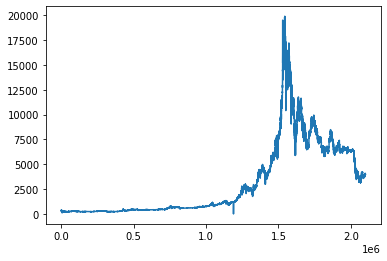

In [12]:
plt.plot(df['Close'])
plt.show()

# Training

In [66]:
# X = df.drop(['Timestamp', 'Weighted_Price', "Close"], axis=1)
y = df['Close'].copy()
X = df['Timestamp'].values.reshape(-1, 1)
# y = df['Close'].copy().values.reshape(-1,1)

print("{}  {} ".format(X.shape, y.shape))

(1990691, 1)  (1990691,) 


In [87]:
regressor = DecisionTreeRegressor(max_depth=7) # melhor profundidade => 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [88]:
print("{}  {} ".format(X_test.shape, y_test.shape))

(796277, 1)  (796277,) 


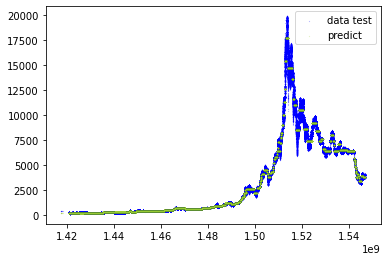

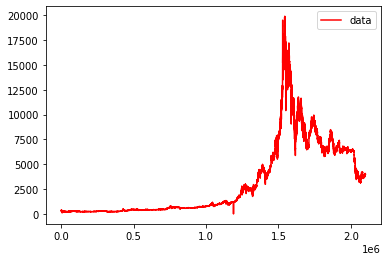

In [89]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure()
plt.scatter( X_test, y_test, s=0.01, c="blue", label="data test")
plt.scatter( X_test, y_pred, s=0.01, color="yellowgreen",  label="predict")
plt.legend()
plt.show()

plt.figure()
plt.plot(y, color="red", label="data")
plt.legend()
plt.show()

# Performace

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

for i in range(1,11): # verificando o melhor parametro max_depth
  regressor = DecisionTreeRegressor(max_depth=i)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

  test_score = cross_val_score(regressor, X_test, y_test)
  print("Max depth: ", i)
  print("Score: ", test_score)
  print("Accuracy: %0.2f (+/- %0.2f)" % (test_score.mean(), test_score.std() * 2))

Max depth:  1
Score:  [0.73582796 0.73798484 0.73586231 0.73573689 0.73654085]
Accuracy: 0.74 (+/- 0.00)
Max depth:  2
Score:  [0.85442953 0.85603285 0.85421381 0.85558984 0.85622389]
Accuracy: 0.86 (+/- 0.00)
Max depth:  3
Score:  [0.91174656 0.91212248 0.91151173 0.91125888 0.9122283 ]
Accuracy: 0.91 (+/- 0.00)
Max depth:  4
Score:  [0.96714004 0.96709692 0.96787073 0.96725929 0.96726027]
Accuracy: 0.97 (+/- 0.00)
Max depth:  5
Score:  [0.98437964 0.98446365 0.98463275 0.98413492 0.98459194]
Accuracy: 0.98 (+/- 0.00)
Max depth:  6
Score:  [0.9910895  0.99118252 0.99122251 0.99095598 0.99129523]
Accuracy: 0.99 (+/- 0.00)
Max depth:  7
Score:  [0.99572296 0.9957152  0.99574918 0.99562131 0.99578497]
Accuracy: 1.00 (+/- 0.00)
Max depth:  8
Score:  [0.99724839 0.99724631 0.99725121 0.99720359 0.99731192]
Accuracy: 1.00 (+/- 0.00)
Max depth:  9
Score:  [0.99838418 0.99840115 0.99837445 0.99837165 0.99839597]
Accuracy: 1.00 (+/- 0.00)
Max depth:  10
Score:  [0.99915798 0.9991337  0.9991636